In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('raw_data.csv')

## Data Cleaning and Preprocessing

### Handling Missing Values

In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

In [9]:
df.set_index('Date', inplace=True)

There is no missing values to handle due to directly crawling from Entrade api

### Handling Outliers

In [11]:
columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [12]:
# Calculate z-scores to identify outliers
from scipy.stats import zscore
outliers_dfd = {}
for column in columns:
    z_scores = zscore(df[column])
    outliers = (z_scores > 3) | (z_scores < -3)
    outliers_df = df[outliers]
    outliers_dfd[column] = outliers_df.copy()
    print(f'{column}: {outliers_df.shape[0]} outliers')

Open: 0 outliers
High: 0 outliers
Low: 0 outliers
Close: 0 outliers
Volume: 3741 outliers


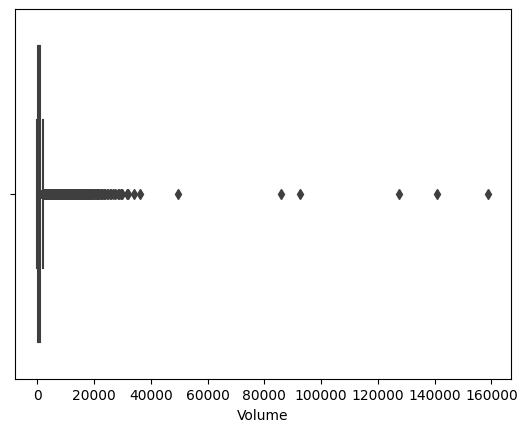

In [14]:
# Use box plots to visualize outliers
import seaborn as sns
sns.boxplot(x=df['Volume'])
plt.show()

Winsorization là gì?
Winsorization là một kỹ thuật biến đổi dữ liệu để giảm tác động của các giá trị outliers bằng cách giới hạn các giá trị cực đại và cực tiểu của dữ liệu vào một ngưỡng nhất định. Trong Python, bạn có thể sử dụng hàm winsorize từ thư viện scipy.stats.mstats để thực hiện điều này.

In [15]:
from scipy.stats.mstats import winsorize
# Áp dụng Winsorization
new_df = df.copy()
new_df['Volume'] = winsorize(new_df['Volume'], limits=[0.05, 0.05])

# Tính toán z-scores và outliers sau khi Winsorization
z_scores_new = zscore(new_df['Volume'])
outliers_new = (z_scores_new > 3) | (z_scores_new < -3)
outliers_df_new = new_df[outliers_new]

print("Số lượng outliers sau Winsorization:", len(outliers_df_new))

Số lượng outliers sau Winsorization: 0


Lợi Nhuận (Returns)
Lợi nhuận, hay "Returns", là một chỉ số quan trọng trong phân tích tài chính và dự đoán. Nó giúp đo lường mức độ thay đổi của giá trị tài sản qua thời gian, từ đó đánh giá hiệu suất đầu tư. Trong bối cảnh dự đoán chứng khoán phái sinh, lợi nhuận giúp ích như sau:

Đánh giá Hiệu Suất Lịch Sử: Bằng cách tính toán lợi nhuận lịch sử, bạn có thể hiểu được xu hướng giá và biến động của tài sản trong quá khứ.
Làm Dữ Liệu Trở Nên Stationary: Nhiều mô hình dự đoán yêu cầu dữ liệu phải stationary (không có xu hướng), lợi nhuận giúp loại bỏ xu hướng của giá và biến chuỗi dữ liệu trở nên stationary.
So Sánh Tương Quan Giữa Các Tài Sản: Lợi nhuận cho phép so sánh hiệu suất giữa các tài sản khác nhau, dù giá trị tuyệt đối của chúng khác nhau.

In [17]:
new_df['Returns'] = new_df['Close'].pct_change()

SMA (Simple Moving Average)
SMA là trung bình cộng của giá trong một khoảng thời gian cụ thể. Nó giúp làm mượt chuỗi dữ liệu và loại bỏ nhiễu, từ đó giúp nhận biết xu hướng tổng quát của giá.

Làm Mượt Dữ Liệu: SMA giúp làm mượt chuỗi giá, từ đó dễ dàng nhận biết xu hướng dài hạn hơn.
Xác Định Xu Hướng: SMA thường được dùng để xác định xu hướng tăng hoặc giảm. Khi giá nằm trên SMA, xu hướng có thể được coi là tăng; ngược lại, khi giá nằm dưới SMA, xu hướng có thể được coi là giảm.
Tín Hiệu Giao Dịch: Các điểm cắt giữa SMA ngắn hạn và dài hạn có thể được dùng làm tín hiệu mua/bán.

In [18]:
new_df['SMA_10'] = new_df['Close'].rolling(window=10).mean()
new_df['SMA_50'] = new_df['Close'].rolling(window=50).mean()

Bollinger Bands
Bollinger Bands gồm một dải giữa (SMA) và hai dải trên/dưới (Upper/Lower Bands) cách nhau một số lần độ lệch chuẩn. Bollinger Bands giúp đo lường độ biến động và xác định các điều kiện quá mua/quá bán.

- Đo Lường Độ Biến Động: Khoảng cách giữa Upper Band và Lower Band cho biết mức độ biến động của giá. Khi khoảng cách này mở rộng, biến động cao; khi thu hẹp, biến động thấp.
- Tín Hiệu Quá Mua/Quá Bán: Khi giá chạm hoặc vượt Upper Band, nó có thể báo hiệu tình trạng quá mua (giá cao và có thể giảm). Ngược lại, khi giá chạm hoặc vượt Lower Band, nó có thể báo hiệu tình trạng quá bán (giá thấp và có thể tăng).
- Xác Định Xu Hướng Tiềm Năng: Khi giá liên tục chạm vào Upper Band trong một thời gian dài, nó có thể cho thấy xu hướng tăng mạnh. Ngược lại, khi giá liên tục chạm vào Lower Band, nó có thể cho thấy xu hướng giảm mạnh.

In [19]:
new_df['Middle_Band'] = new_df['Close'].rolling(window=20).mean()
new_df['Upper_Band'] = new_df['Middle_Band'] + 2 * new_df['Close'].rolling(window=20).std()
new_df['Lower_Band'] = new_df['Middle_Band'] - 2 * new_df['Close'].rolling(window=20).std()

In [20]:
new_df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Returns         1
SMA_10          9
SMA_50         49
Middle_Band    19
Upper_Band     19
Lower_Band     19
dtype: int64

In [21]:
new_df = new_df.iloc[50:]
new_df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Returns        0
SMA_10         0
SMA_50         0
Middle_Band    0
Upper_Band     0
Lower_Band     0
dtype: int64

In [22]:
new_df

,Open,High,Low,Close,Volume,Returns,SMA_10,SMA_50,Middle_Band,Upper_Band,Lower_Band
Date,,,,,,,,,,,
2018-08-13 09:50:00,945.0,945.0,944.4,944.4,366,-0.000635,944.55,943.758,944.325,945.163231,943.486769
2018-08-13 09:51:00,944.5,944.5,944.3,944.5,218,0.000106,944.61,943.786,944.315,945.139046,943.490954
2018-08-13 09:52:00,944.5,945.0,944.4,945.0,124,0.000529,944.68,943.816,944.330,945.193530,943.466470
2018-08-13 09:53:00,945.0,945.4,945.0,945.4,172,0.000423,944.77,943.856,944.380,945.367501,943.392499
2018-08-13 09:54:00,945.4,946.0,945.4,946.0,333,0.000635,944.92,943.914,944.480,945.686299,943.273701
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24 14:27:00,1277.9,1279.6,1277.9,1279.5,1785,0.001409,1277.72,1280.240,1277.555,1282.422713,1272.687287
2024-05-24 14:28:00,1279.5,1280.5,1279.1,1280.5,1503,0.000782,1278.38,1280.206,1277.610,1282.589072,1272.630928
2024-05-24 14:29:00,1280.8,1280.8,1279.1,1279.1,2078,-0.001093,1278.71,1280.140,1277.510,1282.269434,1272.750566


In [25]:
def interpret_skewness(value):
    if value < -1:
        return 'Strongly negatively skewed'
    elif -1 <= value < -0.5:
        return 'Moderately negatively skewed'
    elif -0.5 <= value < 0:
        return 'Slightly negatively skewed'
    elif 0 <= value < 0.5:
        return 'Slightly positively skewed'
    elif 0.5 <= value < 1:
        return 'Moderately positively skewed'
    else:
        return 'Strongly positively skewed'

def interpret_kurtosis(value):
    if value < -1:
        return 'Strongly platykurtic (lighter tails)'
    elif -1 <= value < -0.5:
        return 'Moderately platykurtic (lighter tails)'
    elif -0.5 <= value < 0:
        return 'Slightly platykurtic (lighter tails)'
    elif 0 <= value < 0.5:
        return 'Slightly leptokurtic (heavier tails)'
    elif 0.5 <= value < 1:
        return 'Moderately leptokurtic (heavier tails)'
    else:
        return 'Strongly leptokurtic (heavier tails)'

def analyze_skewness_kurtosis(df):
    skewness = df[['Returns', 'Volume', 'Close']].skew()
    kurtosis = df[['Returns', 'Volume', 'Close']].kurtosis()

    skewness_interpretation = skewness.apply(interpret_skewness)
    kurtosis_interpretation = kurtosis.apply(interpret_kurtosis)

    results = pd.DataFrame({
        'Skewness': skewness,
        'Skewness Interpretation': skewness_interpretation,
        'Kurtosis': kurtosis,
        'Kurtosis Interpretation': kurtosis_interpretation
    })

    return results

results = analyze_skewness_kurtosis(new_df)
results


,Skewness,Skewness Interpretation,Kurtosis,Kurtosis Interpretation
Returns,8.605521,Strongly positively skewed,2184.966545,Strongly leptokurtic (heavier tails)
Volume,1.213706,Strongly positively skewed,0.671162,Moderately leptokurtic (heavier tails)
Close,0.399251,Slightly positively skewed,-1.013124,Strongly platykurtic (lighter tails)
